### Binary classification 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None) # to make all columns visible

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()
print(df.shape)

(569, 33)


## The first thing to do is to see what the features are , what is the description

In [4]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
for index,column in enumerate(df.columns):
    print(index," ",column," ",df[column].dtype)

0   id   int64
1   diagnosis   object
2   radius_mean   float64
3   texture_mean   float64
4   perimeter_mean   float64
5   area_mean   float64
6   smoothness_mean   float64
7   compactness_mean   float64
8   concavity_mean   float64
9   concave points_mean   float64
10   symmetry_mean   float64
11   fractal_dimension_mean   float64
12   radius_se   float64
13   texture_se   float64
14   perimeter_se   float64
15   area_se   float64
16   smoothness_se   float64
17   compactness_se   float64
18   concavity_se   float64
19   concave points_se   float64
20   symmetry_se   float64
21   fractal_dimension_se   float64
22   radius_worst   float64
23   texture_worst   float64
24   perimeter_worst   float64
25   area_worst   float64
26   smoothness_worst   float64
27   compactness_worst   float64
28   concavity_worst   float64
29   concave points_worst   float64
30   symmetry_worst   float64
31   fractal_dimension_worst   float64
32   Unnamed: 32   float64


### ID and unnamed 32 is a waste of resource to our machine learning , sooner or later we will need to get rid of it

In [7]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#lets check for the missing values 
df.isna().sum().sum()

0

### IT seems that the data is clean thus far

### 1.Find discrete columns

In [10]:
categorical_columns=[]
for col in df.columns:
    if len(df[col].unique())<10:
        categorical_columns.append(col)

In [11]:
categorical_columns ## which implies that no discrete column in present 

['diagnosis']

### Check the distribution of continious data

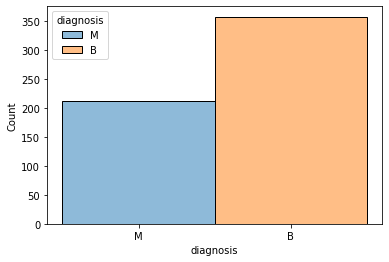

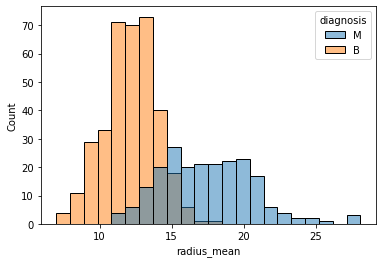

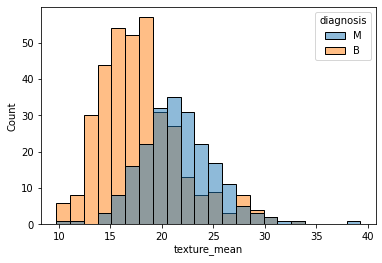

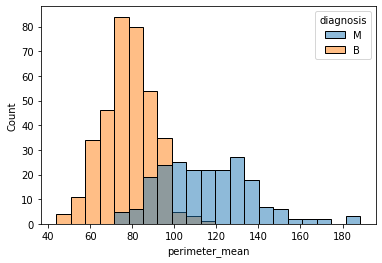

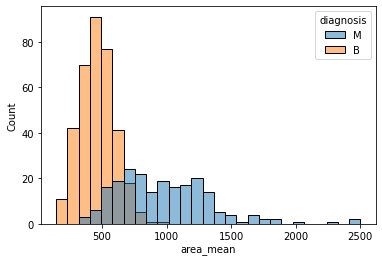

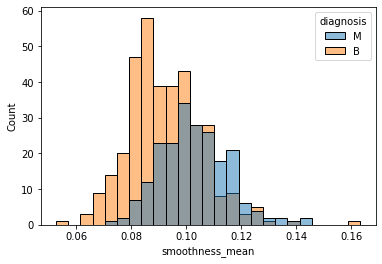

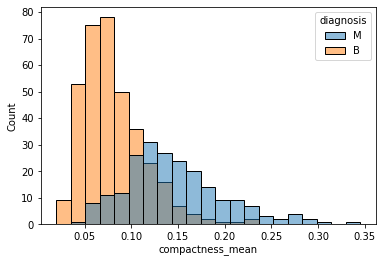

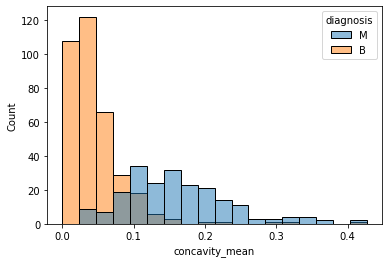

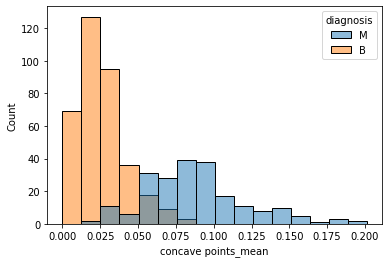

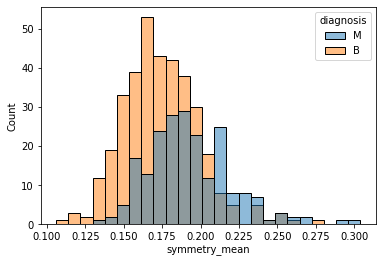

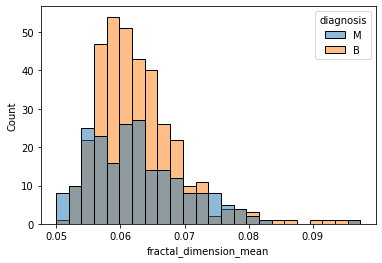

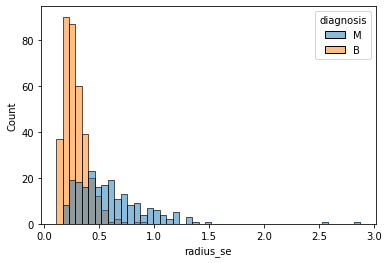

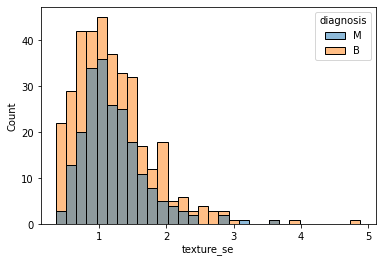

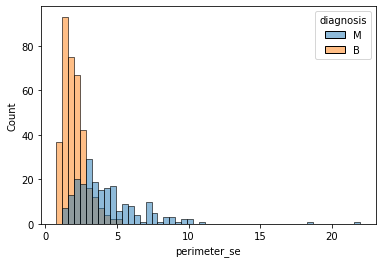

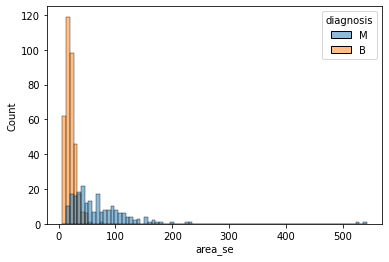

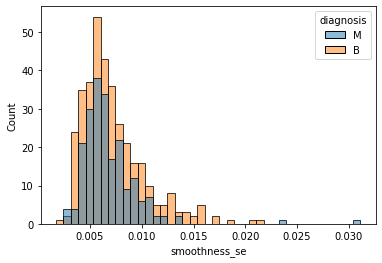

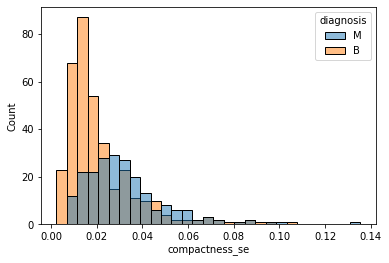

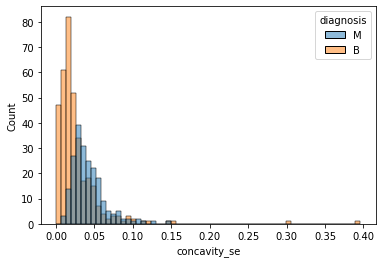

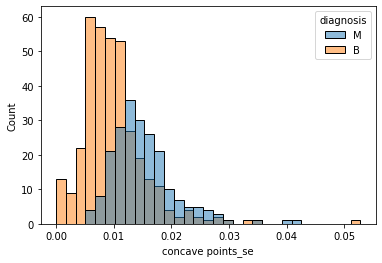

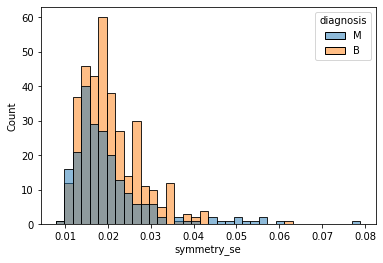

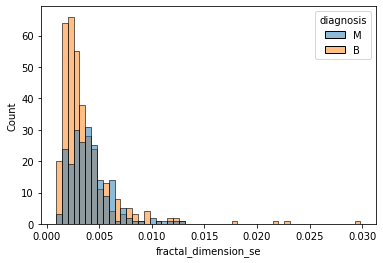

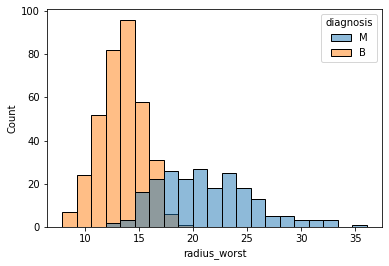

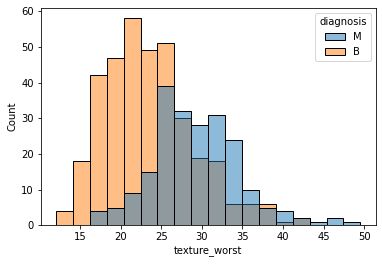

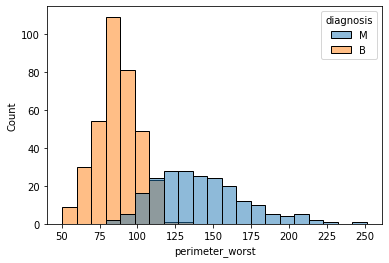

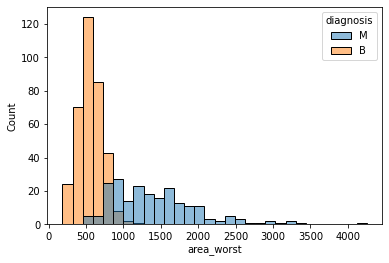

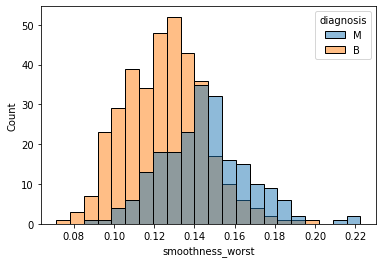

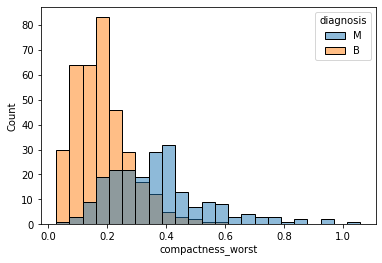

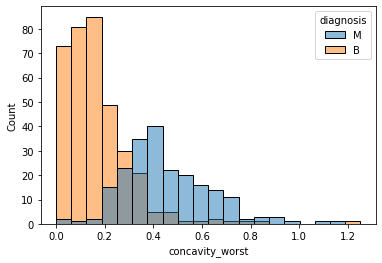

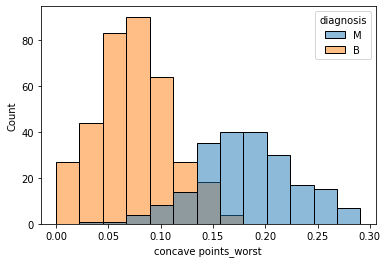

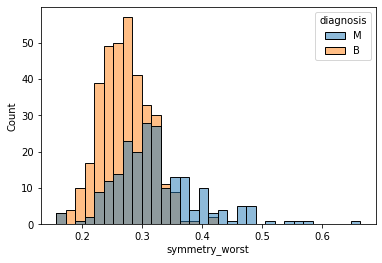

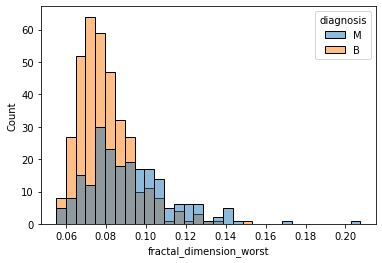

In [12]:
for col in df.columns:
    sns.histplot(data=df,x=col,hue='diagnosis')
    plt.show()

### We will check for the correlation of the data to find out multiple correlation as well as correlation with diagnosis

In [13]:
### Converting malignant and beniegn to numericcal )data

In [14]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [15]:
correlation_table=pd.DataFrame(df.corr(method='spearman')) # since non linear correlation is also important
correlation_table

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.732785,0.461971,0.748496,0.734122,0.371892,0.609288,0.733308,0.777877,0.332567,...,0.787933,0.476720,0.796319,0.786902,0.425513,0.606810,0.705734,0.781674,0.396843,0.311477
radius_mean,0.732785,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,...,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_mean,0.461971,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,...,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_mean,0.748496,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,...,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_mean,0.734122,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,...,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_mean,0.371892,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,...,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_mean,0.609288,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,...,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_mean,0.733308,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,...,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_mean,0.777877,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,...,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110
symmetry_mean,0.332567,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,...,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069


In [16]:
correlated_col=correlation_table['diagnosis'].loc[(correlation_table['diagnosis']>0.5)  | (correlation_table['diagnosis']<-0.5)].index

In [17]:
correlated_col

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [18]:
### Now we will find the inter correlation for removing redundant features
df[correlated_col].corr(method='spearman')

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
diagnosis,1.000000,0.732785,0.748496,0.734122,0.609288,0.733308,0.777877,0.616912,0.630411,0.714184,0.787933,0.796319,0.786902,0.606810,0.705734,0.781674
radius_mean,0.732785,1.000000,0.997802,0.999602,0.497578,0.645728,0.759702,0.550247,0.565520,0.738077,0.978604,0.971555,0.978863,0.491357,0.596043,0.727265
perimeter_mean,0.748496,0.997802,1.000000,0.997068,0.543925,0.681958,0.788629,0.560326,0.582789,0.745824,0.981244,0.978980,0.980864,0.534565,0.632106,0.757526
area_mean,0.734122,0.999602,0.997068,1.000000,0.488988,0.642557,0.755165,0.553388,0.568237,0.741518,0.979258,0.971822,0.980264,0.485813,0.593736,0.723390
compactness_mean,0.609288,0.497578,0.543925,0.488988,1.000000,0.896518,0.848295,0.506582,0.583520,0.539511,0.542626,0.592254,0.531590,0.901029,0.837921,0.825473
concavity_mean,0.733308,0.645728,0.681958,0.642557,0.896518,1.000000,0.927352,0.575277,0.646199,0.644344,0.682316,0.722424,0.676628,0.849985,0.938543,0.904938
concave points_mean,0.777877,0.759702,0.788629,0.755165,0.848295,0.927352,1.000000,0.635054,0.679841,0.726982,0.787411,0.813960,0.780395,0.758309,0.827281,0.937075
radius_se,0.616912,0.550247,0.560326,0.553388,0.506582,0.575277,0.635054,1.000000,0.957728,0.952867,0.598030,0.592509,0.595732,0.339725,0.404431,0.508662
perimeter_se,0.630411,0.565520,0.582789,0.568237,0.583520,0.646199,0.679841,0.957728,1.000000,0.926937,0.606902,0.626896,0.605163,0.438416,0.490340,0.569428
area_se,0.714184,0.738077,0.745824,0.741518,0.539511,0.644344,0.726982,0.952867,0.926937,1.000000,0.774244,0.768336,0.775662,0.413658,0.500307,0.619539


### As we can see from here that,
### [ radius mean,radius worst, perimeter mean,perimeter worst ,area worst and area mean] 
### are highly correlated .Removing any 3 won't make much difference because they are 99+ % correlated

In [19]:
###so from here we can see that\
df2=df[correlated_col]
df2=df2.drop(['radius_worst','perimeter_mean','perimeter_worst','area_worst','area_mean'],axis=1)

In [20]:
### Checking for some other things

In [21]:
df_experiment=df2.copy()
df_experiment.head()

,diagnosis,radius_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,0.27760,0.3001,0.14710,1.0950,8.589,153.40,0.6656,0.7119,0.2654
1,1,20.57,0.07864,0.0869,0.07017,0.5435,3.398,74.08,0.1866,0.2416,0.1860
2,1,19.69,0.15990,0.1974,0.12790,0.7456,4.585,94.03,0.4245,0.4504,0.2430
3,1,11.42,0.28390,0.2414,0.10520,0.4956,3.445,27.23,0.8663,0.6869,0.2575
4,1,20.29,0.13280,0.1980,0.10430,0.7572,5.438,94.44,0.2050,0.4000,0.1625


### Will compactness mean and worst together perform better than indivisual

In [22]:
print('correlation of compactness mean is ',df_experiment['compactness_mean'].corr(df_experiment['diagnosis'],method='spearman'))
print('correlation of compactness_worst is ',df_experiment['compactness_worst'].corr(df_experiment['diagnosis'],method='spearman'))
compactness=df_experiment['compactness_mean']+df_experiment['compactness_worst']
compactness.corr(df_experiment['diagnosis'],method='spearman')
df_experiment['compactness']=compactness
df_experiment.drop(['compactness_mean','compactness_worst'],axis=1,inplace=True)

correlation of compactness mean is  0.6092883740075209
correlation of compactness_worst is  0.6068099168638246


### Will concavity mean and worst together perform better than indivisual

In [23]:
print('correlation of concavity mean is ',df_experiment['concavity_mean'].corr(df_experiment['diagnosis'],method='spearman'))
print('correlation of concavity_worst is ',df_experiment['concavity_worst'].corr(df_experiment['diagnosis'],method='spearman'))
concavity=df_experiment['concavity_mean']+df_experiment['concavity_worst']
concavity.corr(df_experiment['diagnosis'],method='spearman')

print('we might just drop concavity worst')
df_experiment.drop('concavity_worst',axis=1,inplace=True)

correlation of concavity mean is  0.7333078827585809
correlation of concavity_worst is  0.7057340103846973
we might just drop concavity worst


### Will concave points mean and worst together perform better than indivisual

In [24]:
print('correlation of concave points mean is ',df_experiment['concave points_mean'].corr(df_experiment['diagnosis'],method='spearman'))
print('correlation of concave points_worst is ',df_experiment['concave points_worst'].corr(df_experiment['diagnosis'],method='spearman'))
concave=df_experiment['concave points_mean']+df_experiment['concave points_worst']
concave.corr(df_experiment['diagnosis'],method='spearman')
df_experiment.drop(['concave points_mean','concave points_worst'],axis=1,inplace=True)
df_experiment['concave points']=concave

correlation of concave points mean is  0.777877465455518
correlation of concave points_worst is  0.7816735854904382


In [25]:
print('correlation of concavity_mean is ',df_experiment['concavity_mean'].corr(df_experiment['diagnosis'],method='spearman'))
print('correlation of concave points is ',df_experiment['concave points'].corr(df_experiment['diagnosis'],method='spearman'))
concave_2=0.6*df_experiment['concavity_mean']+0.4*df_experiment['concave points']
concave_2.corr(df_experiment['diagnosis'],method='spearman')

correlation of concavity_mean is  0.7333078827585809
correlation of concave points is  0.7880459931025814


0.766557815823348

In [26]:
df_experiment.head()

,diagnosis,radius_mean,concavity_mean,radius_se,perimeter_se,area_se,compactness,concave points
0,1,17.99,0.3001,1.0950,8.589,153.40,0.94320,0.41250
1,1,20.57,0.0869,0.5435,3.398,74.08,0.26524,0.25617
2,1,19.69,0.1974,0.7456,4.585,94.03,0.58440,0.37090
3,1,11.42,0.2414,0.4956,3.445,27.23,1.15020,0.36270
4,1,20.29,0.1980,0.7572,5.438,94.44,0.33780,0.26680


In [27]:
df_experiment.corr(method='spearman')

,diagnosis,radius_mean,concavity_mean,radius_se,perimeter_se,area_se,compactness,concave points
diagnosis,1.000000,0.732785,0.733308,0.616912,0.630411,0.714184,0.617255,0.788046
radius_mean,0.732785,1.000000,0.645728,0.550247,0.565520,0.738077,0.501503,0.748465
concavity_mean,0.733308,0.645728,1.000000,0.575277,0.646199,0.644344,0.878742,0.925353
radius_se,0.616912,0.550247,0.575277,1.000000,0.957728,0.952867,0.391101,0.556408
perimeter_se,0.630411,0.565520,0.646199,0.957728,1.000000,0.926937,0.486144,0.612269
area_se,0.714184,0.738077,0.644344,0.952867,0.926937,1.000000,0.455046,0.662480
compactness,0.617255,0.501503,0.878742,0.391101,0.486144,0.455046,1.000000,0.845313
concave points,0.788046,0.748465,0.925353,0.556408,0.612269,0.662480,0.845313,1.000000


### Still we can see that radius se and perimeter se are highly correlated so we will drop one 

In [28]:
df_experiment.drop(['perimeter_se','area_se'],axis=1,inplace=True)

In [29]:
df_experiment.corr()

,diagnosis,radius_mean,concavity_mean,radius_se,compactness,concave points
diagnosis,1.000000,0.730029,0.696360,0.567134,0.607938,0.804321
radius_mean,0.730029,1.000000,0.676764,0.679090,0.448213,0.790029
concavity_mean,0.696360,0.676764,1.000000,0.631925,0.807835,0.902754
radius_se,0.567134,0.679090,0.631925,1.000000,0.348895,0.605889
compactness,0.607938,0.448213,0.807835,0.348895,1.000000,0.806313
concave points,0.804321,0.790029,0.902754,0.605889,0.806313,1.000000


### Visualizing using PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA(n_components=2)

pca_X=pca.fit_transform(df_experiment.iloc[:,1:])

In [33]:
pca_X=pd.DataFrame(pca_X,columns=['1st_col','2nd_col'])
pca_X.head(10)

,1st_col,2nd_col
0,3.915502,0.694863
1,6.435886,-0.329531
2,5.581250,0.092443
3,-2.669056,0.702065
4,6.171764,-0.075686
5,-1.665529,0.243585
6,4.118998,-0.204116
7,-0.401041,0.270305
8,-1.115769,0.216729
9,-1.639552,0.531601


In [34]:
pca_X['diagnosis']=df_experiment['diagnosis']
pca_X['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [35]:
pca.explained_variance_ratio_ ### seems like all of the variance lies in 1st axis 

array([0.99345706, 0.00350735])

<AxesSubplot:xlabel='1st_col', ylabel='2nd_col'>

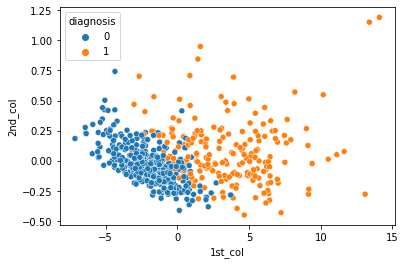

In [36]:
sns.scatterplot(data=pca_X,x='1st_col',y='2nd_col',hue='diagnosis')

In [37]:
import pickle
final_data=open('final_data.pkl','wb')
pickle.dump(df_experiment,final_data)
final_data.close()

In [38]:

PCA_data=open('pca_data.pkl','wb')
pickle.dump(pca_X,PCA_data)
PCA_data.close()